<a href="https://colab.research.google.com/github/Subhajit53/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction : Characterize the mail and track the mail</u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

## <b> Data Description </b>

### Number of observations : 68353

### <b> Columns : </b>

1.   Email_ID : Unique identifier of emails sent
2.   Email_Type : Type of email encoded as 1 and 2   
3.   Subject_Hotness_Score : A score between 0 to 5 for hotness of the email topic
4.   Email_Source_Type : Source of email encoded as 1 and 2
5.   Customer_Location : Location of customer encoded as A,B,C,D,E,F,G
6.   Email_Campaign_Type : Type of campaign encoded as 1, 2 and 3
7.   Total_Past_Communications : Number of past communications
8.   Time_Email_sent_Category	: Time at which email email was sent encoded as 1, 2 and 3
9.   Word_Count : Words in the email
10.   Total_Links : Number of links in the email
11.   Total_Images : Number of images in the email
12.   Email_Status : Email status encoded as 0 : ignored, 1 : read, 2 : acknowledged









# **Introduction :**
##### An email campaign is a sequence of marketing efforts that contacts multiple recipients at once. Email campaigns are designed to reach out to subscribers at the best time and provide valuable content and relevant offers. Using email campaigns allows you to build deep and trusting relationships with your customers.

##### There are multiple factors that are working behind success of an email campaign like email contents, time at which email was sent, length of the email etc.

##### Here, I want to build a classification model to predict whether any particular campaign email is going blind or hitting the target.

# **Approach :**
##### To solve the problem, I have devised a 3-step approach below:

#### **1. Basic EDA :**
##### In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the variables in hand.


#### **2. Model training and testing :**
##### In this step, I shall get a train-test pair from the given dataset and fit 5 classification models to the train set, make predictions on the test set using them and calculate various evaluation metrics. The models are namely : Decision Trees, Random Forests, Gradient Boosting Machine, Support Vector Machines, Naive-Bayes Classifier.

**Note:** A point to be noted here. We can't fit a logistic regression here as this is a multi-class (>2) classification problem.

#### **3. Model Evaluation :**
##### As the last step, I shall compare all the models and try to come up with a conclusion about which model might be the best choice here.

# **Analysis:**

### **Data Exporting and exploration :**

In [62]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Classification Project/Copy of data_email_campaign.csv', index_col='Email_ID')

In [4]:
# Getting a glimpse of the data
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_ID,,,,,,,,,,,
EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [5]:
# Getting the shape of the data
df.shape

(68353, 11)

In [6]:
# Getting a short info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  61528 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                66152 non-null  float64
 9   Total_Images               66676 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


## **1. Basic EDA :**

### **Imputing Missing Values :**

From the data shape and info it is clear that there are some null values in the dataset. Let's have a look at them and see what we can do to impute them.

The columns with missing values are :

1.   Customer_Location (Categorical)
2.   Total_Past_Communications (Numerical)
3.   Total_Links (Numerical)
4.   Total_Images (Numerical)



We can do one thing here. We can first get dummy features on categorical column and then use KNNImputer to impute the missing values.

In [7]:
# Getting dummy variables
df_with_dummy = pd.get_dummies(df, prefix = '', prefix_sep = '')

In [8]:
# Imputing missing data using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_with_no_na = imputer.fit_transform(df_with_dummy)

In [9]:
df_with_no_na = pd.DataFrame(df_with_no_na, columns = df_with_dummy.columns)

Cool! Now let's impute the new modified columns to the main dataset.

In [10]:
# Replace columns with na values
df['Total_Past_Communications'] = df_with_no_na['Total_Past_Communications'].values
df['Total_Links'] = df_with_no_na['Total_Links'].values
df['Total_Images'] = df_with_no_na['Total_Images'].values

In [11]:
# Check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


Awesome! Now let's do something about the categorical column. I am going to use ML to solve this problem. I will build a simple Decision Trees model to predict Customer Location based on other features which will be trained on non-null observations and will predict on null observations.

In [13]:
# Preparing the data
df_with_no_null_cust_loc = df[df['Customer_Location'].isna() == False]
df_with_null_cust_loc = df[df['Customer_Location'].isna() == True]

In [24]:
# Getting Training set
X_train = df_with_no_null_cust_loc.drop(['Customer_Location'], axis = 1)
y_train = df_with_no_null_cust_loc['Customer_Location']
X_test = df_with_null_cust_loc.drop(['Customer_Location'], axis = 1)

# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Fitting the model
dtree_model = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)

# Getting accuracy on train set
print(dtree_model.score(X_train, y_train))

0.9337714507206033


Pretty good! Now I will use this model to get my Customer Locations filled.

In [50]:
# Getting predictions and saving it with null valued dataset
prediction = pd.DataFrame(dtree_model.predict(X_test), columns = ['Customer_Location'], index = df_with_null_cust_loc.index)
df_with_null_cust_loc = pd.merge(df_with_null_cust_loc, prediction[['Customer_Location']],how = 'left',left_index = True, right_index = True)

In [59]:
# Replacing nulls with predicted values in the original dataset
df.loc[df['Customer_Location'].isna() == True, 'Customer_Location'] = df_with_null_cust_loc['Customer_Location']

In [61]:
# Check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          68353 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 8.8+ MB


Alright! Now we are done with the treatment of null values. Now let's have some visualizations!

### **Visualizations :**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

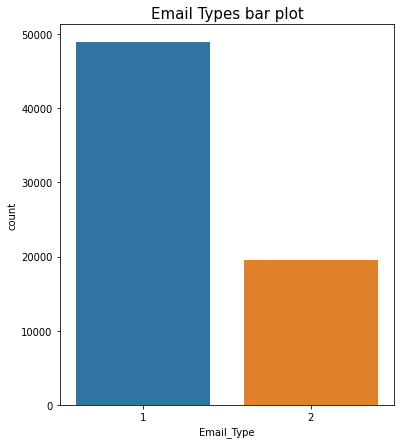

In [70]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,7))
sns.countplot(df['Email_Type'])
plt.title('Email Types bar plot', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subject Hotness Score')

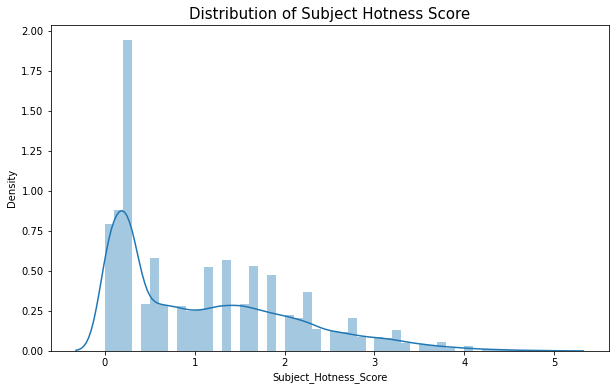

In [73]:
# Plotting histogram for Subject_Hotness_Score
plt.figure(figsize=(10,6))
sns.distplot(df['Subject_Hotness_Score'])
plt.title('Distribution of Subject Hotness Score', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Source Types bar plot')

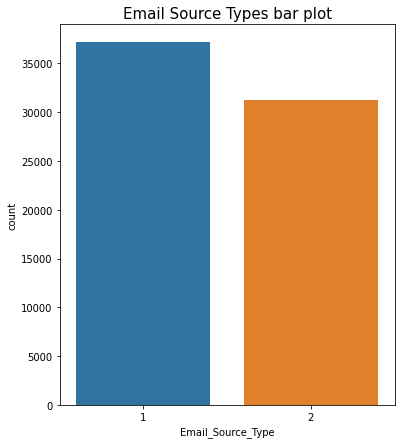

In [74]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(6,7))
sns.countplot(df['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Customer Locations bar plot after imputing nulls')

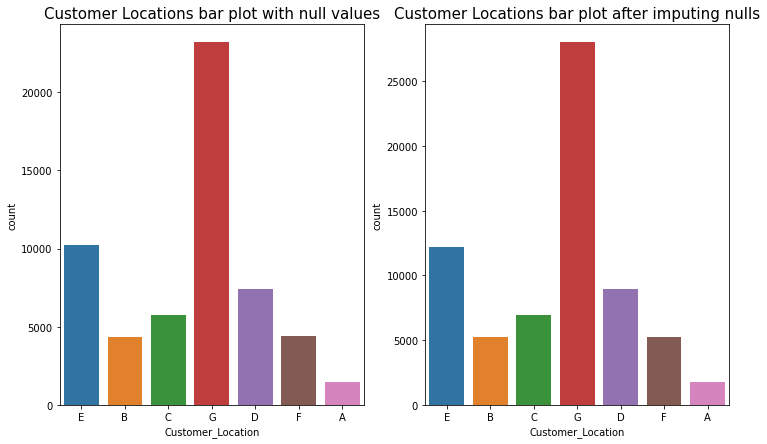

In [83]:
plt.figure(figsize=(12,7))

# Reading the dataset again
df1 = pd.read_csv('/content/drive/MyDrive/Classification Project/Copy of data_email_campaign.csv', index_col='Email_ID')

# Plotting Customer Locations with null values
plt.subplot(1,2,1)
sns.countplot(df1['Customer_Location'])
plt.title('Customer Locations bar plot with null values', fontsize=15)

# Plotting bar plot for Customer_Location
plt.subplot(1,2,2)
sns.countplot(df['Customer_Location'])
plt.title('Customer Locations bar plot after imputing nulls', fontsize=15)